In [1]:
import nbimporter
from data_preparation import *

Importing Jupyter notebook from data_preparation.ipynb


In [2]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import colorlover as cl
import plotly_express as px

import spacy
spacy.load('es')
spacy.load('en')
spacy.load('fr')
from spacy.lang.es import Spanish
from spacy.lang.en import English
from spacy.lang.fr import French
parser_esp = Spanish()
parser_fr = French()
parser_en = English()

import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
es_stop = set(nltk.corpus.stopwords.words('spanish'))
en_stop = set(nltk.corpus.stopwords.words('english'))
fr_stop = set(nltk.corpus.stopwords.words('french'))

spacy_stopwords_esp = spacy.lang.es.stop_words.STOP_WORDS
spacy_stopwords_en = spacy.lang.en.stop_words.STOP_WORDS
spacy_stopwords_fr = spacy.lang.fr.stop_words.STOP_WORDS

from langdetect import detect
from wordcloud import WordCloud

import random
import gensim
import pickle

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)

paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress


[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
dataframe_all_en = get_dataframe_analysis_en(True)
dataframe_all_en.head()
dataframe_all_text_en = get_dataframe_analysis_en(False)
dataframe_all_text_en.head()

Age  \
0   37   
1   62   
2   28   
3   31   
4   24   

  Are you able to express verbally the emotions produced by an image you have seen?  \
0                                    3. Occasionally                                  
1                                    3. Occasionally                                  
2                                    3. Occasionally                                  
3                                    3. Occasionally                                  
4                                     2. Very rarely                                  

  By reusing an image, can you redefine the message that the sender has thought about?  \
0                                                Yes                                     
1                                                Yes                                     
2                                                Yes                                     
3                                                Yes                                     
4                            Do not know / No answer                                     

  Classify your degree of vision  \
0                      3. Medium   
1                      3. Medium   
2                        4. Good   
3                        4. Good   
4                        4. Good   

             Do you find this image attractive? Why?  \
0                Si, el puente que sostiene al tren    
1  Serviría para ilustrar una historia. Quizá una...   
2  No, no encuentro enfocados elementos que me at...   
3  No. No me gusta que se vean las obras al fondo...   
4                    No, me transmite mucha tristeza   

        Do you find this image attractive? Why?       \
0                           No, me provoca angustia    
1                       Broma de chocolate con leche   
2  Sí, es muy curioso el contraste de colores ent...   
3  No. Me parece divertida y original, pero no la...   
4        No, porque la persona sale haciendo el bobo   

           Do you find this image attractive? Why?.1  \
0                                No, no me interesa    
1  Texturas, personas, no sabemos quienes pero el...   
2  Sí, me causa curiosidad la situación que se va...   
3  No. No me gusta la Semana Santa aunque ciertam...   
4                                                 Si   

           Do you find this image attractive? Why?.2  \
0               No, demasiado color y no.me.interesa   
1  Exhuberancia se recrea en la iconografia  con ...   
2  Sí, el color y las metáforas que recoge están ...   
3  No. Me parece que es recargada, que no está bi...   
4                     Si, por los colores llamativos   

           Do you find this image attractive? Why?.3  \
0            Si, por el efecto del cohete en la mano   
1  No se discute la hombría de quién de modo tan ...   
2  Sí, el lanzamiento de cohete con el humo y la ...   
3  Sí, me parece que captura el momento, la celeb...   
4                                                 No   

  Do you have access to devices (computer, mobile, tablet, etc.) connected to the Internet usually?  \
0                             5. Several times a day                                                  
1                             5. Several times a day                                                  
2                             5. Several times a day                                                  
3                             5. Several times a day                                                  
4                             5. Several times a day                                                  

                                                                                   ...                                                                                    \
0                                                                                  ...                                                                                     
1            

In [4]:
dataframe_all_esp = get_dataframe_analysis_esp(True)
dataframe_all_esp.head()
dataframe_all_text_esp = get_dataframe_analysis_esp(False)
dataframe_all_text_esp.head()

Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado?  \
0                                                 Sí                                       
1                                                 Sí                                       
2                                                 Sí                                       
3                                                 Sí                                       
4                                              NS/NC                                       

  Clasifica tu grado de visión  \
0                   3. Regular   
1                   3. Regular   
2                     4. Bueno   
3                     4. Bueno   
4                     4. Bueno   

  Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)?  \
0                                           1. Nunca                                                                                                                                                 
1                                    3. En ocasiones                                                                                                                                                 
2                                    3. En ocasiones                                                                                                                                                 
3                          5. Casi siempre o siempre                                                                                                                                                 
4                                 4. Bastantes veces                                                                                                                                                 

  Cuando compartes imágenes, ¿habitualmente las envías a otras personas?  \
0                                    3. En ocasiones                       
1                          5. Casi siempre o siempre                       
2                                    3. En ocasiones                       
3                                 4. Bastantes veces                       
4                                 4. Bastantes veces                       

  Cuando compartes imágenes, ¿habitualmente las produces tú?  \
0         4. Muchas veces envío imágenes que hago yo           
1         4. Muchas veces envío imágenes que hago yo           
2         4. Muchas veces envío imágenes que hago yo           
3         4. Muchas veces envío imágenes que hago yo           
4  3. A veces envío imágenes que hago yo y otras ...           

  Cuando compartes imágenes, ¿habitualmente las recibes de otras personas?  \
0                                    3. En ocasiones                         
1                          5. Casi siempre o siempre                         
2                                 4. Bastantes veces                         
3                                 2. Muy pocas veces                         
4                                 4. Bastantes veces                         

  Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [1. Cámara de fotos]  \
0                                                 No                                                    
1                                                 No                                                    
2                                                 No                                                    
3                                                 Sí                                                    
4                                                 Sí                                                    

  Cuando generas una imagen, ¿qué tipo de dispositivo usas? (Respuesta múltiple) [2. Teléfono móvil]  \
0        

In [5]:
def visualize_culture_all_esp(dataframe):
    newDataframe = dataframe.copy()
    for column in get_all_cultural_items_esp():
        try:
            print(f'Describiendo la pregunta {column}')
            dict_item = get_data_replacements(str(column))
            if dict_item:
                newDataframe[column] = newDataframe[column].apply(get_data_replacements(str(column)).get)
            display(newDataframe[column].describe())
            print(
                f'Conteo de cada valor en {column} expresada como valor / cantidad')
            display(newDataframe[column].value_counts().sort_index())
            print(
                f'Porcentaje de cada valor en {column} expresado como valor / porcentaje')
            display(newDataframe[column].value_counts(normalize=True).sort_index().round(4) * 100)
            # sns.distplot(workCleanDummiesCluster.loc[workCleanDummiesCluster['cluster'] == selected_cluster][column], kde=False, rug=True);
            data = [go.Bar(x=sorted(newDataframe[column].unique()),
                           y=newDataframe[column].value_counts().reindex(
                               newDataframe[column].unique(), fill_value=0).sort_index(),
                           marker=dict(color=cl.scales['6']['div']['Spectral']))]

            iplot(data)
            plt.show()
        except BaseException:
            pass

In [6]:
def visualize_cultural_all_en(dataframe):
    newDataframe = dataframe.copy()
    for column in get_all_cultural_items_en():
        try:
            print(f'Describing the feature {column}')
            dict_item = get_data_replacements(str(column))
            if dict_item:
                newDataframe[column] = newDataframe[column].apply(get_data_replacements(str(column)).get)
            display(newDataframe[column].describe())
            print(
                f'Count of each value in {column} expresed as value / amount')
            display(newDataframe[column].value_counts().sort_index())
            print(
                f'Percentage of each value in {column} expresed as value / percentage')
            display(newDataframe[column].value_counts(normalize=True).sort_index().round(4) * 100)
            display(newDataframe[column].value_counts(normalize=True).sort_index().round(4) * 100)
            data = [go.Bar(x=sorted(newDataframe[column].unique()),
                           y=newDataframe[column].value_counts().reindex(
                               newDataframe[column].unique(), fill_value=0).sort_index(),
                           marker=dict(color=cl.scales['6']['div']['Spectral']))]

            iplot(data)
            plt.show()
        except BaseException:
            pass

In [7]:
def tokenize(text, language):
    lda_tokens = []
    if language == 'es':
        tokens = parser_esp(str(text))
    elif language == 'en':
        tokens = parser_en(str(text))
    elif language == 'fr':
        tokens = parser_fr(str(text))

    for token in tokens:
        if token.orth_.isspace():
            continue
        elif token.like_url:
            lda_tokens.append('URL')
        elif token.orth_.startswith('@'):
            lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens


def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma


def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)


def prepare_text_for_lda(text, language):
    tokens = tokenize(text, language)
    tokens = [token for token in tokens if len(token) > 4]
    # tokens = [token for token in tokens if token not in es_stop]
    if language == 'es':
        tokens = [token for token in tokens if token not in es_stop]
    elif language == 'en':
        tokens = [token for token in tokens if token not in en_stop]
    elif language == 'fr':
        tokens = [token for token in tokens if token not in fr_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(30, 60)

def get_topics_lda(dataframe, column, num_results=15, num_passes=15, num_words=4):
    newDataframe = dataframe.copy()
    text_data = []
    for line in newDataframe[column]:
        #print(str(line))
        try:
            lang = detect(str(line))
            if lang == 'es':
                tokens = prepare_text_for_lda(line, 'es')
            elif lang == 'en':
                tokens = prepare_text_for_lda(line, 'en')
            elif lang == 'fr':
                tokens = prepare_text_for_lda(line, 'fr')
            else:
                tokens = prepare_text_for_lda(line, 'en')
            if random.random() > .66:
                # print(tokens)
                text_data.append(tokens)
        except:
            #print("Error!: "+str(line))
            pass
    dictionary = gensim.corpora.Dictionary(text_data)
    corpus = [dictionary.doc2bow(text) for text in text_data]
    pickle.dump(corpus, open('corpus.pkl', 'wb'))
    dictionary.save('dictionary.gensim')
    
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = num_results, id2word=dictionary, passes=num_passes)
    ldamodel.save('model5.gensim')

    for index in sorted(ldamodel.print_topics(num_words=num_words), key=lambda tup: -1*tup[1]):
        print("\nTopic: {}".format(index))

        
def visualize_text_responses_esp(dataframe, column):
    newDataframe = dataframe.copy()
    response_column = 'tokens-visual-issues-esp'
    print(f'Describiendo la variable: {column}')
    n_responses = newDataframe[column].count()
    print(f'Número de respuestas: {n_responses} ')
    print(f'% de respuestas sobre el total: {(n_responses / get_total_population_analysis(dataframe) * 100):.2f} ')

    if n_responses > 0:
        list_responses = []
        for line in newDataframe[column]:
            try:
                lang = detect(str(line))
                if lang == 'es':
                    tokens = prepare_text_for_lda(line, 'es')
                elif lang == 'en':
                    tokens = prepare_text_for_lda(line, 'en')
                elif lang == 'fr':
                    tokens = prepare_text_for_lda(line, 'fr')
                else:
                    tokens = prepare_text_for_lda(line, 'en')
            except BaseException:
                tokens = prepare_text_for_lda(line, 'en')

            # tokens = [token.text for token in doc if not token.is_stop]

            # word.lemma_
            list_responses.append(tokens)
        try:
            m = np.asarray(list_responses)
            newDataframe[response_column] = m

            # print(list_responses)
            list_responses2 = list(
                filter(lambda a: str(a) != "['nan']", list_responses))
            # print(list_responses2)

            all_responses = []

            for sublist in list_responses2:
                for item in sublist:
                    all_responses.append(item)

            # responses_series = pd.Series((v[0] for v in list_responses))
            responses_series = pd.Series(all_responses)
            # print(responses_series)

            # display(responses_series.str.lower().value_counts())

            data = [go.Bar(x=sorted(responses_series.str.lower().unique()),
                           y=responses_series.str.lower().value_counts().reindex(
                responses_series.str.lower().unique(), fill_value=0).sort_index(),
                marker=dict(color=cl.interp(cl.scales['9']['div']['Spectral'], responses_series.str.lower().nunique())))]

            iplot(data)
            plt.show()
            # print(all_responses)
            all_responses_text = ' '.join(all_responses)
            # display(all_responses_text)
            wordcloud = WordCloud(font_path='/home/jovyan/fonts/Dosis-Regular.ttf', background_color="white", prefer_horizontal=1, width=800, height=400).generate(all_responses_text)
            # generate word cloud
            # display(responses_series.str.lower().value_counts().to_dict())
            wordcloud.generate_from_frequencies(
                responses_series.str.lower().value_counts().to_dict())

            # show
            print('Wordcloud')
            plt.figure(figsize = (100, 50))
            plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3), interpolation="bilinear")
            plt.axis("off")
            plt.show()
        except BaseException:
            if n_responses == 1:
                print(f'La respuesta recibida no es válida para generar los gráficos')
            else:
                print(f'De las {n_responses} respuestas recibidas, no existe ninguna válida para generar los gráficos')

In [8]:
visualize_culture_all_esp(dataframe_all_esp)

Describiendo la pregunta ¿Crees que las imágenes producidas por hombres son diferentes a las que hacen mujeres?


count     767
unique      2
top        No
freq      511
Name: ¿Crees que las imágenes producidas por hombres son diferentes a las que hacen mujeres?, dtype: object

Conteo de cada valor en ¿Crees que las imágenes producidas por hombres son diferentes a las que hacen mujeres? expresada como valor / cantidad


No    511
Sí    256
Name: ¿Crees que las imágenes producidas por hombres son diferentes a las que hacen mujeres?, dtype: int64

Porcentaje de cada valor en ¿Crees que las imágenes producidas por hombres son diferentes a las que hacen mujeres? expresado como valor / porcentaje


No    66.62
Sí    33.38
Name: ¿Crees que las imágenes producidas por hombres son diferentes a las que hacen mujeres?, dtype: float64

Describiendo la pregunta ¿Crees que en la creacción de imágenes trabajan más mujeres, u hombres?


count                      767
unique                       4
top       3. Los dos por igual
freq                       399
Name: ¿Crees que en la creacción de imágenes trabajan más mujeres, u hombres?, dtype: object

Conteo de cada valor en ¿Crees que en la creacción de imágenes trabajan más mujeres, u hombres? expresada como valor / cantidad


1. Más mujeres que hombres     105
2. Más hombres que mujeres.    150
3. Los dos por igual           399
4. NS / NC                     113
Name: ¿Crees que en la creacción de imágenes trabajan más mujeres, u hombres?, dtype: int64

Porcentaje de cada valor en ¿Crees que en la creacción de imágenes trabajan más mujeres, u hombres? expresado como valor / porcentaje


1. Más mujeres que hombres     13.69
2. Más hombres que mujeres.    19.56
3. Los dos por igual           52.02
4. NS / NC                     14.73
Name: ¿Crees que en la creacción de imágenes trabajan más mujeres, u hombres?, dtype: float64

Describiendo la pregunta ¿Conoces autores/as que trabajen produciendo imágenes?


count     767
unique      2
top        No
freq      544
Name: ¿Conoces autores/as que trabajen produciendo imágenes?, dtype: object

Conteo de cada valor en ¿Conoces autores/as que trabajen produciendo imágenes? expresada como valor / cantidad


No    544
Sí    223
Name: ¿Conoces autores/as que trabajen produciendo imágenes?, dtype: int64

Porcentaje de cada valor en ¿Conoces autores/as que trabajen produciendo imágenes? expresado como valor / porcentaje


No    70.93
Sí    29.07
Name: ¿Conoces autores/as que trabajen produciendo imágenes?, dtype: float64

Describiendo la pregunta ¿Te gusta seguir a personas que admiras en redes sociales? ¿Eres fan o follower de alguna? ¿En ocasiones escribes comentarios en sus publicaciones?


count                                                   767
unique                                                    5
top       3. A veces interactúo con sus publicaciones en...
freq                                                    296
Name: ¿Te gusta seguir a personas que admiras en redes sociales? ¿Eres fan o follower de alguna? ¿En ocasiones escribes comentarios en sus publicaciones?, dtype: object

Conteo de cada valor en ¿Te gusta seguir a personas que admiras en redes sociales? ¿Eres fan o follower de alguna? ¿En ocasiones escribes comentarios en sus publicaciones? expresada como valor / cantidad


1. No soy fan de nadie a quien admire                                          124
2. Soy fan, pero no interactúas con sus publicaciones                          193
3. A veces interactúo con sus publicaciones en forma de like                   296
4. Soy fan y me gusta relacionarme con ellos de vez en cuando                  127
5. Soy fan y siempre hago comentarios en las publicaciones que me interesan     27
Name: ¿Te gusta seguir a personas que admiras en redes sociales? ¿Eres fan o follower de alguna? ¿En ocasiones escribes comentarios en sus publicaciones?, dtype: int64

Porcentaje de cada valor en ¿Te gusta seguir a personas que admiras en redes sociales? ¿Eres fan o follower de alguna? ¿En ocasiones escribes comentarios en sus publicaciones? expresado como valor / porcentaje


1. No soy fan de nadie a quien admire                                          16.17
2. Soy fan, pero no interactúas con sus publicaciones                          25.16
3. A veces interactúo con sus publicaciones en forma de like                   38.59
4. Soy fan y me gusta relacionarme con ellos de vez en cuando                  16.56
5. Soy fan y siempre hago comentarios en las publicaciones que me interesan     3.52
Name: ¿Te gusta seguir a personas que admiras en redes sociales? ¿Eres fan o follower de alguna? ¿En ocasiones escribes comentarios en sus publicaciones?, dtype: float64

Describiendo la pregunta Cuando usas redes sociales, ¿consideras que ser aceptado como miembro de un grupo es más importante que tener autonomía e independencia?


count            767
unique             5
top       3. Neutral
freq             260
Name: Cuando usas redes sociales, ¿consideras que ser aceptado como miembro de un grupo es más importante que tener autonomía e independencia?, dtype: object

Conteo de cada valor en Cuando usas redes sociales, ¿consideras que ser aceptado como miembro de un grupo es más importante que tener autonomía e independencia? expresada como valor / cantidad


1. Nada importante    206
2. Poco importante    159
3. Neutral            260
4. Importante         115
5. Muy importante      27
Name: Cuando usas redes sociales, ¿consideras que ser aceptado como miembro de un grupo es más importante que tener autonomía e independencia?, dtype: int64

Porcentaje de cada valor en Cuando usas redes sociales, ¿consideras que ser aceptado como miembro de un grupo es más importante que tener autonomía e independencia? expresado como valor / porcentaje


1. Nada importante    26.86
2. Poco importante    20.73
3. Neutral            33.90
4. Importante         14.99
5. Muy importante      3.52
Name: Cuando usas redes sociales, ¿consideras que ser aceptado como miembro de un grupo es más importante que tener autonomía e independencia?, dtype: float64

Describiendo la pregunta Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado?


count     767
unique      3
top        Sí
freq      430
Name: Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado?, dtype: object

Conteo de cada valor en Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado? expresada como valor / cantidad


NS/NC    199
No       138
Sí       430
Name: Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado?, dtype: int64

Porcentaje de cada valor en Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado? expresado como valor / porcentaje


NS/NC    25.95
No       17.99
Sí       56.06
Name: Al reutilizar una imagen, ¿crees puedes redefinir el mensaje que el emisor ha pensado?, dtype: float64

Describiendo la pregunta Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)?


count                 767
unique                  5
top       3. En ocasiones
freq                  304
Name: Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)?, dtype: object

Conteo de cada valor en Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)? expresada como valor / cantidad


1. Nunca                      77
2. Muy pocas veces           155
3. En ocasiones              304
4. Bastantes veces           175
5. Casi siempre o siempre     56
Name: Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)?, dtype: int64

Porcentaje de cada valor en Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)? expresado como valor / porcentaje


1. Nunca                     10.04
2. Muy pocas veces           20.21
3. En ocasiones              39.63
4. Bastantes veces           22.82
5. Casi siempre o siempre     7.30
Name: Cuando compartes imágenes en redes sociales, ¿las acompañas de texto siguiendo las indicaciones que te sugieren las aplicaciones (etiquetado, explicación de la imagen, texto inspirador, etc.)?, dtype: float64

Describiendo la pregunta En alguna ocasión, aún estando preparado para ello, ¿has dejado de incorporar imágenes en tus mensajes en redes sociales, aplicaciones móviles, etc., porque no entiendes cómo hacerlo?


count          767
unique           5
top       1. Nunca
freq           290
Name: En alguna ocasión, aún estando preparado para ello, ¿has dejado de incorporar imágenes en tus mensajes en redes sociales, aplicaciones móviles, etc., porque no entiendes cómo hacerlo?, dtype: object

Conteo de cada valor en En alguna ocasión, aún estando preparado para ello, ¿has dejado de incorporar imágenes en tus mensajes en redes sociales, aplicaciones móviles, etc., porque no entiendes cómo hacerlo? expresada como valor / cantidad


1. Nunca                     290
2. Muy pocas veces           236
3. En ocasiones              146
4. Bastantes veces            82
5. Casi siempre o siempre     13
Name: En alguna ocasión, aún estando preparado para ello, ¿has dejado de incorporar imágenes en tus mensajes en redes sociales, aplicaciones móviles, etc., porque no entiendes cómo hacerlo?, dtype: int64

Porcentaje de cada valor en En alguna ocasión, aún estando preparado para ello, ¿has dejado de incorporar imágenes en tus mensajes en redes sociales, aplicaciones móviles, etc., porque no entiendes cómo hacerlo? expresado como valor / porcentaje


1. Nunca                     37.81
2. Muy pocas veces           30.77
3. En ocasiones              19.04
4. Bastantes veces           10.69
5. Casi siempre o siempre     1.69
Name: En alguna ocasión, aún estando preparado para ello, ¿has dejado de incorporar imágenes en tus mensajes en redes sociales, aplicaciones móviles, etc., porque no entiendes cómo hacerlo?, dtype: float64

Describiendo la pregunta Cuando haces fotos desde cualquiera de los medios a tu alcance, ¿te facilitan el proceso las opciones que te ofrecen las aplicaciones (filtros, recortes, edición mediante grafismo, etc.)?


count                 767
unique                  5
top       3. En ocasiones
freq                  268
Name: Cuando haces fotos desde cualquiera de los medios a tu alcance, ¿te facilitan el proceso las opciones que te ofrecen las aplicaciones (filtros, recortes, edición mediante grafismo, etc.)?, dtype: object

Conteo de cada valor en Cuando haces fotos desde cualquiera de los medios a tu alcance, ¿te facilitan el proceso las opciones que te ofrecen las aplicaciones (filtros, recortes, edición mediante grafismo, etc.)? expresada como valor / cantidad


1. Nunca                      63
2. Muy pocas veces           136
3. En ocasiones              268
4. Bastantes veces           218
5. Casi siempre o siempre     82
Name: Cuando haces fotos desde cualquiera de los medios a tu alcance, ¿te facilitan el proceso las opciones que te ofrecen las aplicaciones (filtros, recortes, edición mediante grafismo, etc.)?, dtype: int64

Porcentaje de cada valor en Cuando haces fotos desde cualquiera de los medios a tu alcance, ¿te facilitan el proceso las opciones que te ofrecen las aplicaciones (filtros, recortes, edición mediante grafismo, etc.)? expresado como valor / porcentaje


1. Nunca                      8.21
2. Muy pocas veces           17.73
3. En ocasiones              34.94
4. Bastantes veces           28.42
5. Casi siempre o siempre    10.69
Name: Cuando haces fotos desde cualquiera de los medios a tu alcance, ¿te facilitan el proceso las opciones que te ofrecen las aplicaciones (filtros, recortes, edición mediante grafismo, etc.)?, dtype: float64

In [9]:
# visualize_cultural_all_en(dataframe_all_en)

Describiendo la variable: Si encuentras diferencias, escribe cuáles
Número de respuestas: 284 
% de respuestas sobre el total: 37.03 


Wordcloud


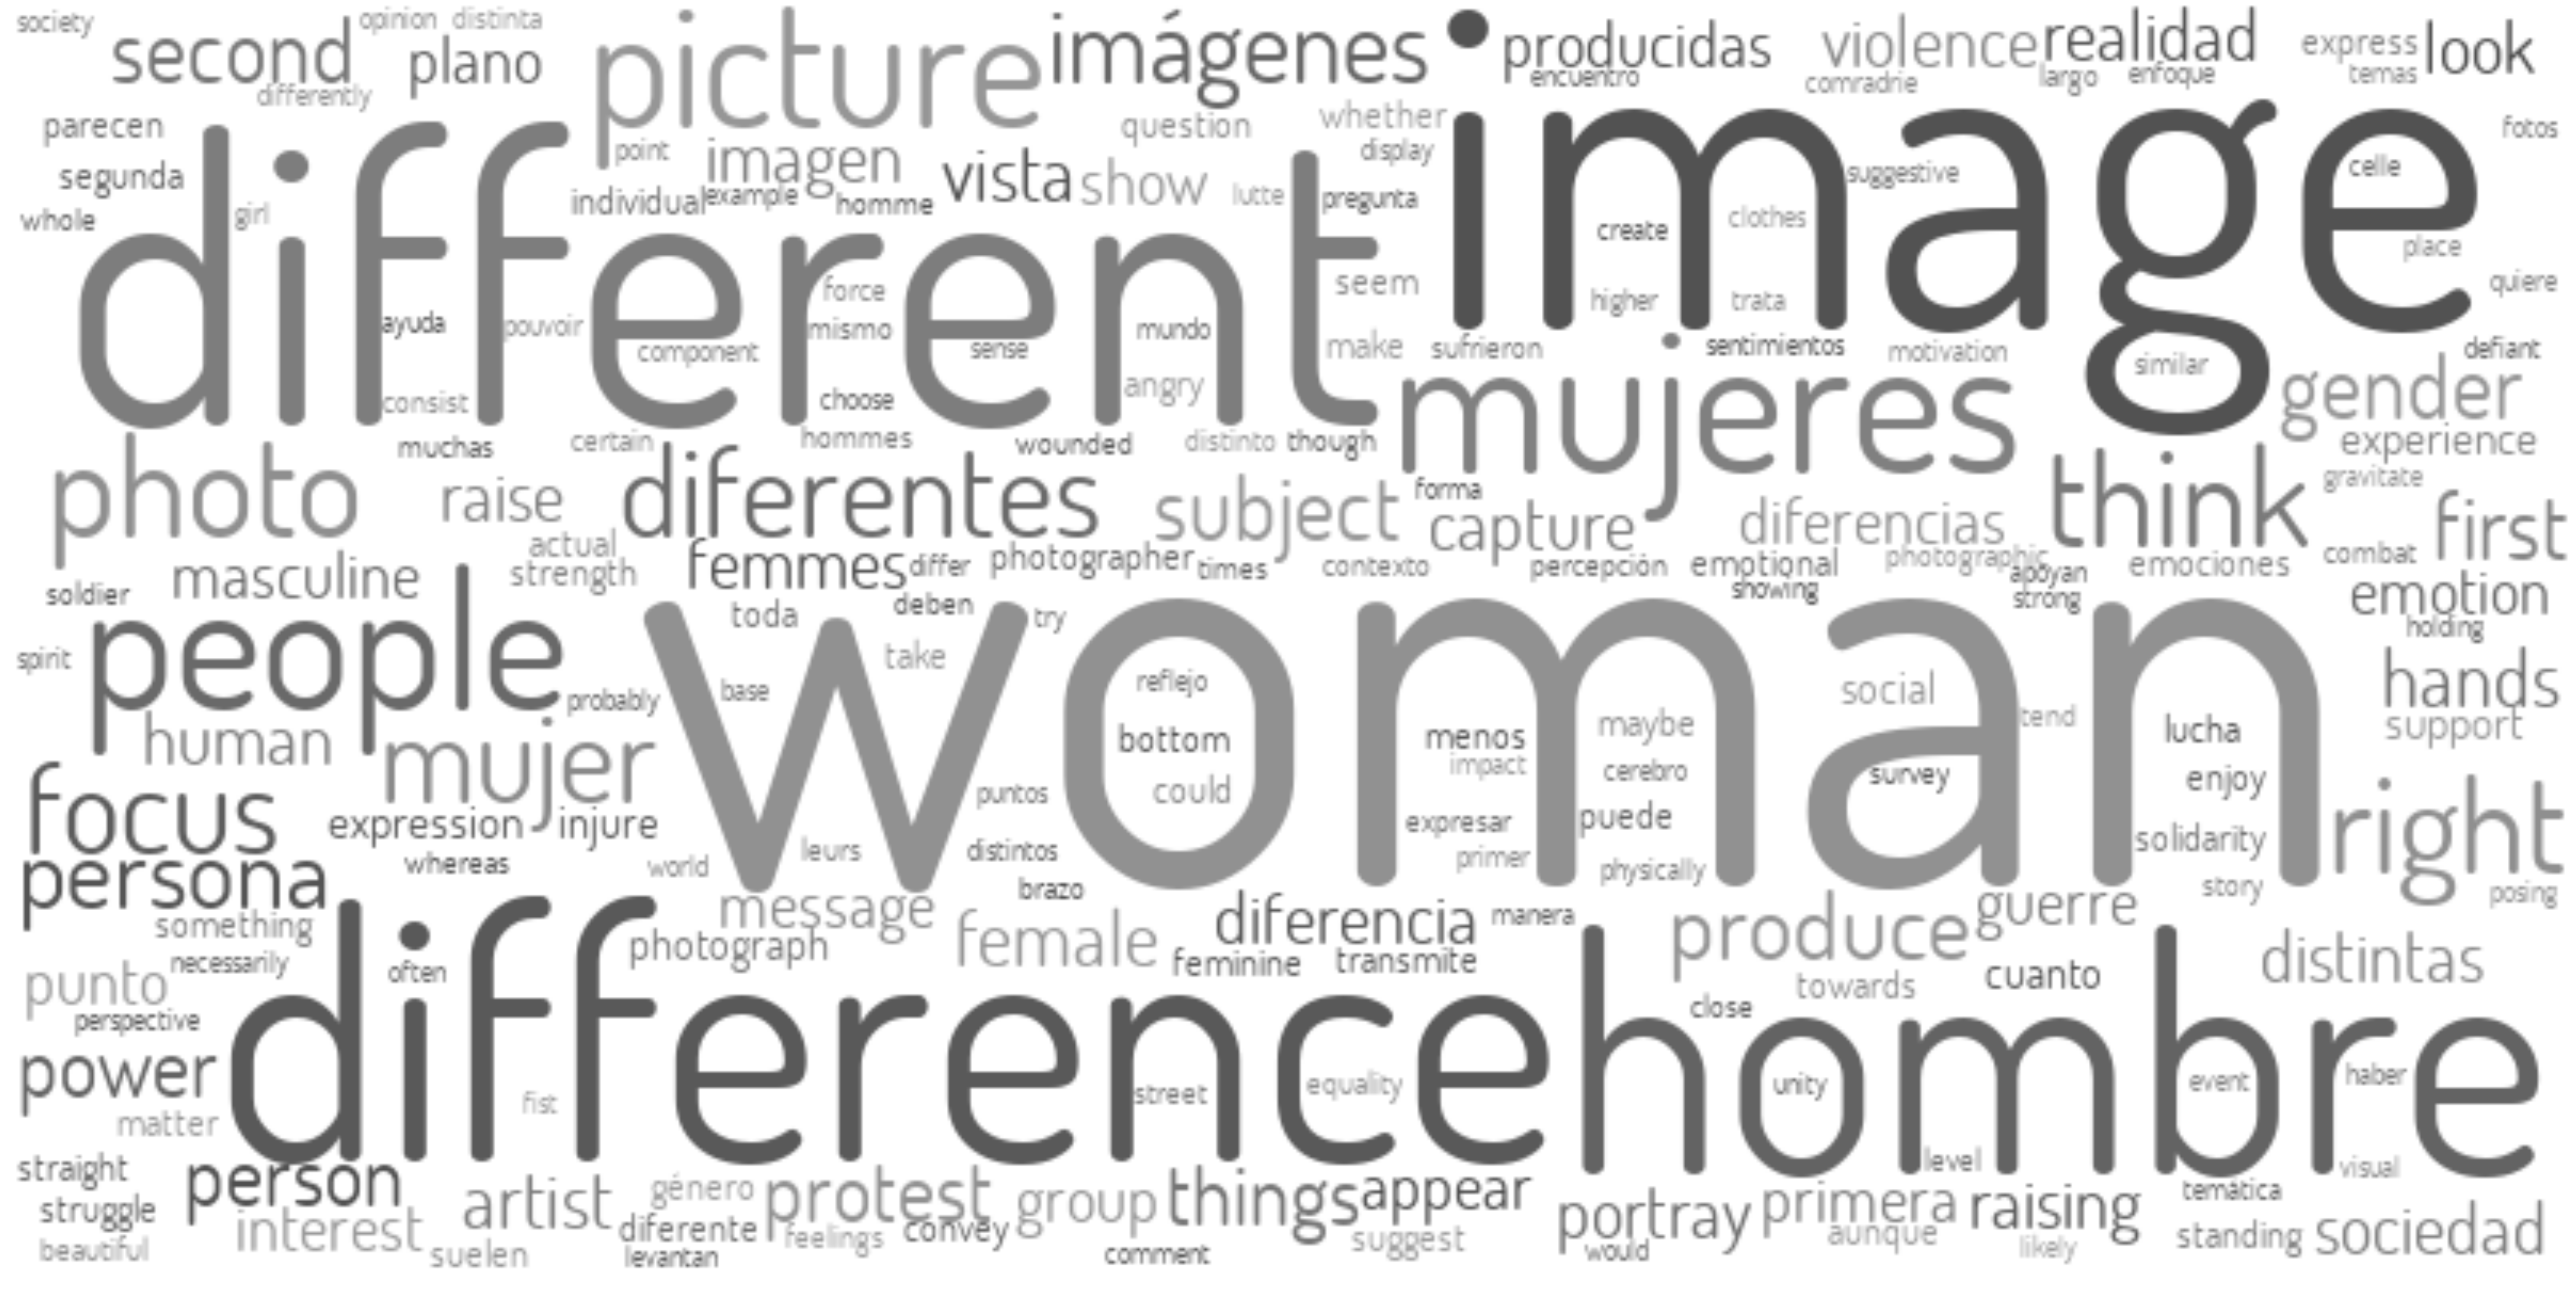

In [10]:
visualize_text_responses_esp(dataframe_all_text_esp, 'Si encuentras diferencias, escribe cuáles')

In [11]:
get_topics_lda(dataframe_all_text_esp, 'Si encuentras diferencias, escribe cuáles', num_results=15, num_passes=15, num_words=10)


Topic: (0, '0.078*"difference" + 0.043*"woman" + 0.039*"image" + 0.039*"focus" + 0.039*"group" + 0.020*"think" + 0.020*"person" + 0.020*"necessarily" + 0.020*"either" + 0.020*"masculine"')

Topic: (1, '0.031*"brazo" + 0.031*"transmite" + 0.031*"society" + 0.016*"hombre" + 0.016*"mucha" + 0.016*"venir" + 0.016*"tension" + 0.016*"pareciera" + 0.016*"circunstancia" + 0.016*"isquierdo"')

Topic: (2, '0.093*"woman" + 0.060*"image" + 0.025*"take" + 0.025*"whether" + 0.025*"emotional" + 0.025*"show" + 0.025*"enfoque" + 0.025*"ayuda" + 0.025*"motivation" + 0.015*"different"')

Topic: (3, '0.033*"hombre" + 0.025*"woman" + 0.020*"imágenes" + 0.020*"mujeres" + 0.020*"vista" + 0.014*"producidas" + 0.014*"largo" + 0.014*"strong" + 0.014*"mujer" + 0.014*"think"')

Topic: (4, '0.048*"human" + 0.048*"spirit" + 0.048*"mujeres" + 0.025*"vivencias" + 0.025*"parte" + 0.025*"mismo" + 0.025*"hecho" + 0.025*"expresarse" + 0.025*"toda" + 0.025*"hombre"')

Topic: (5, '0.070*"woman" + 0.036*"difference" + 0.03

Describiendo la variable: Pon un ejemplo
Número de respuestas: 282 
% de respuestas sobre el total: 36.77 


Wordcloud


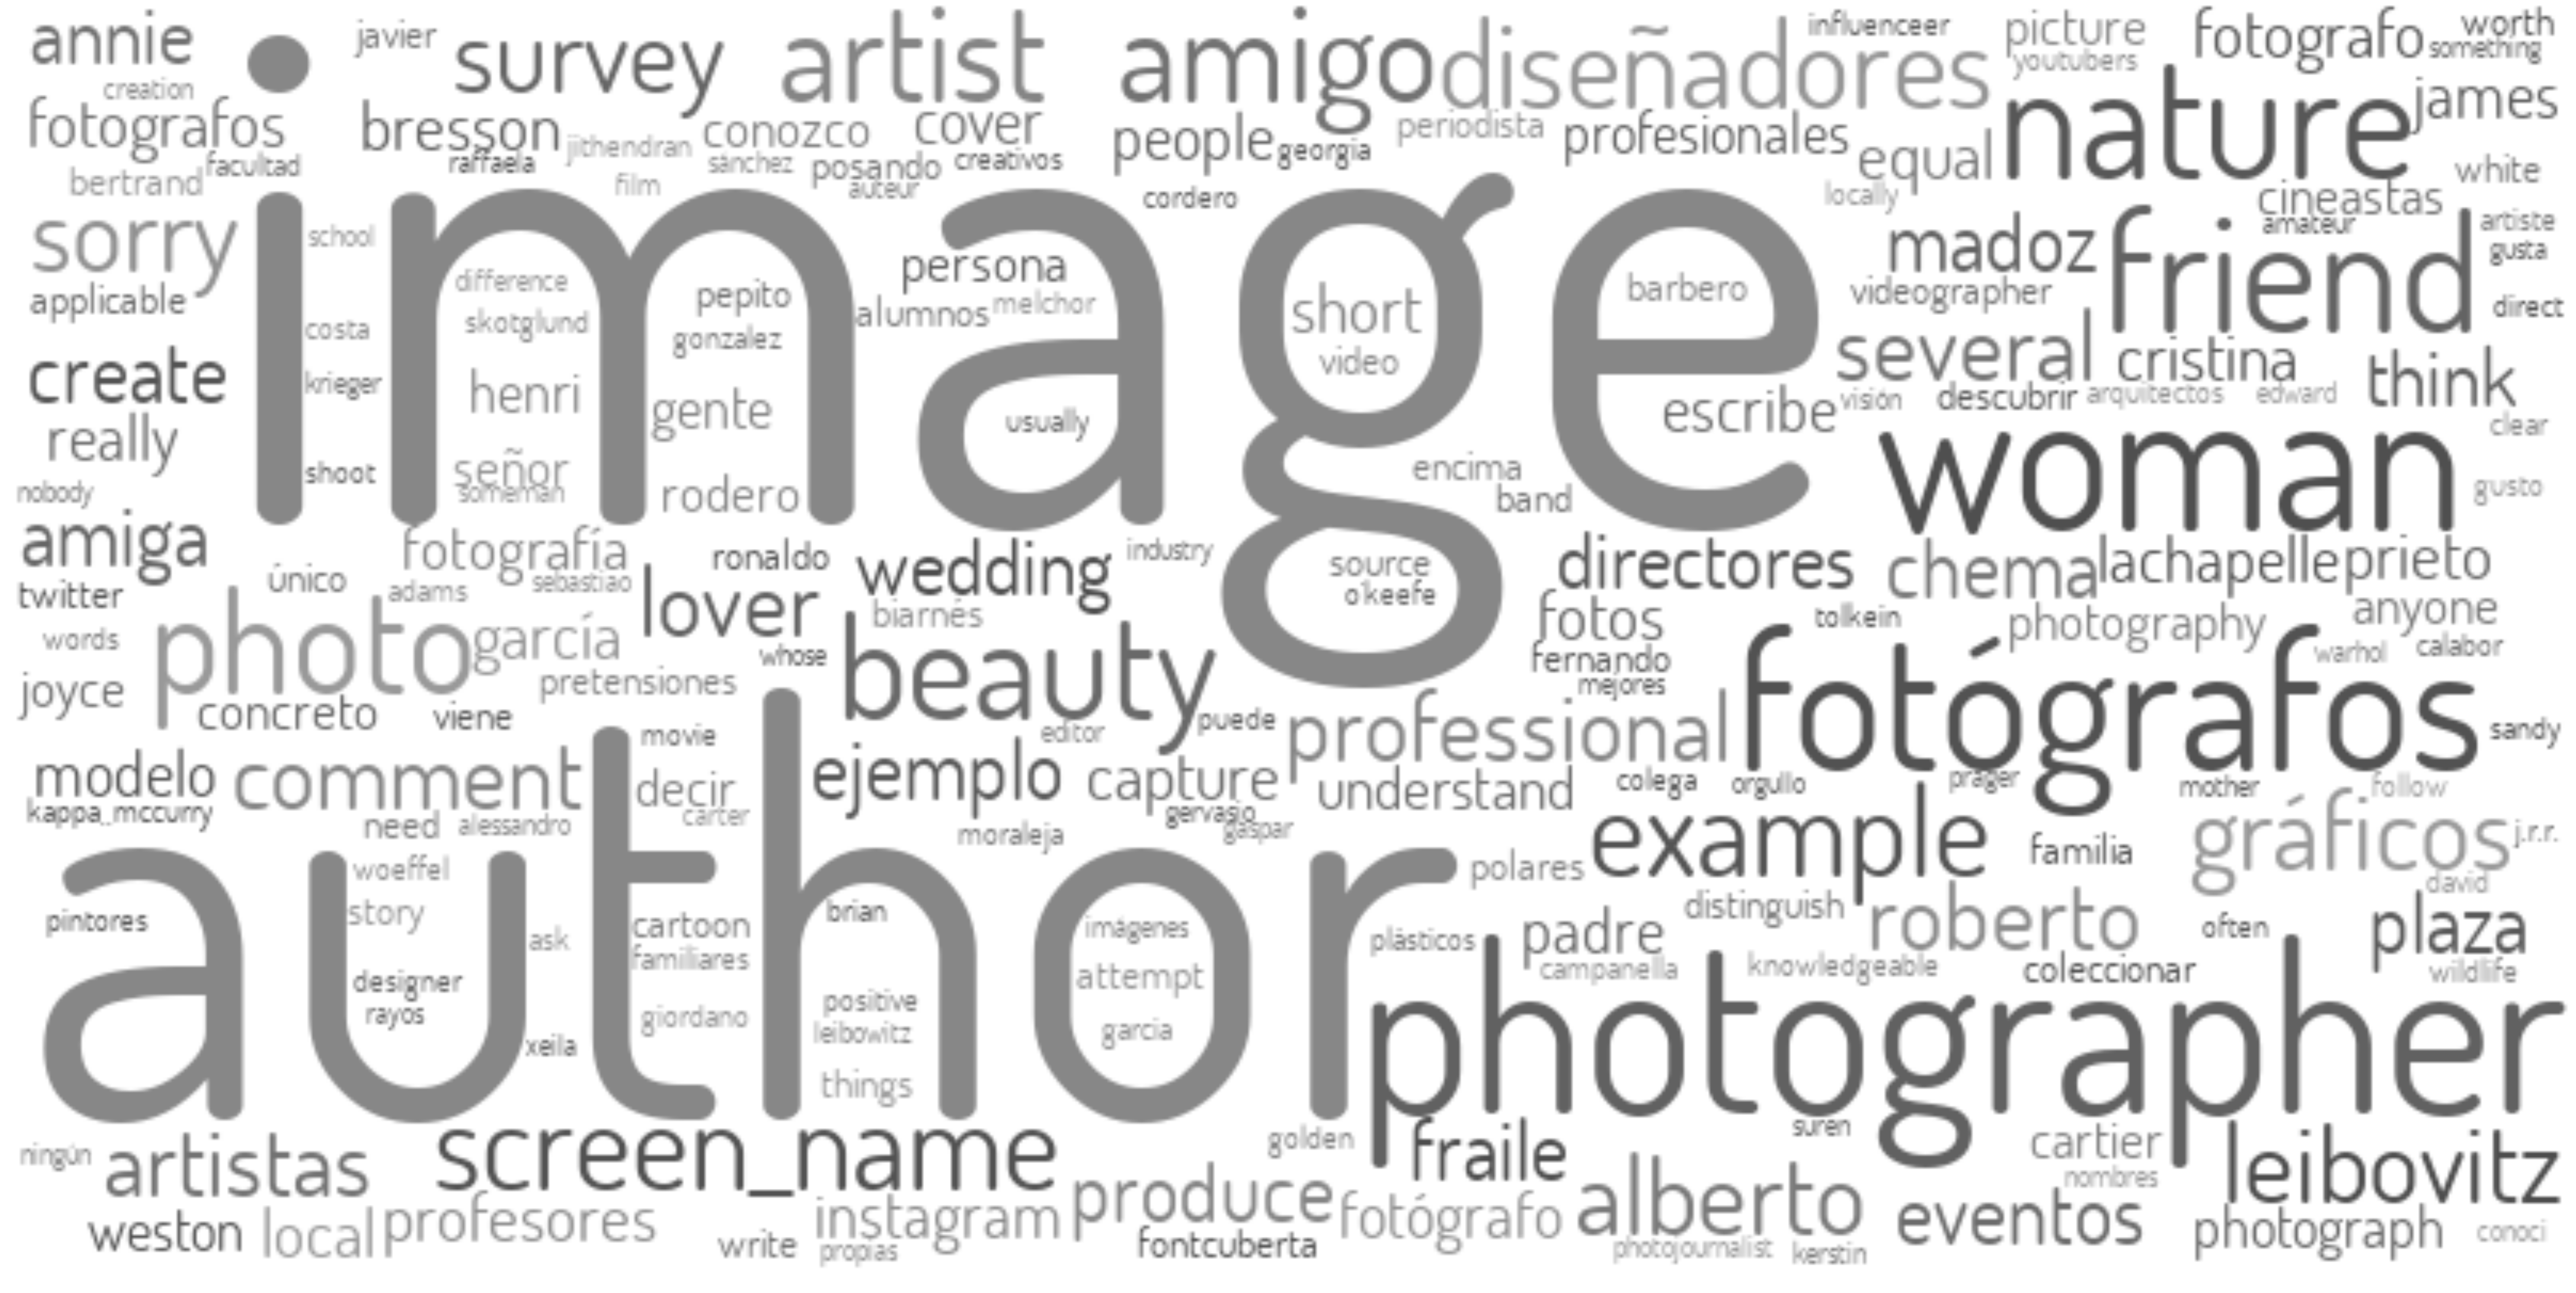

In [12]:
visualize_text_responses_esp(dataframe_all_text_esp, 'Pon un ejemplo')

In [13]:
get_topics_lda(dataframe_all_text_esp, 'Pon un ejemplo', num_results=15, num_passes=15, num_words=10)


Topic: (0, '0.120*"fotógrafos" + 0.081*"artistas" + 0.081*"directores" + 0.042*"cineastas" + 0.042*"diseñadores" + 0.042*"plásticos" + 0.042*"profesionales" + 0.042*"manveylan" + 0.042*"ansel" + 0.042*"suren"')

Topic: (1, '0.147*"photographer" + 0.089*"friend" + 0.060*"SCREEN_NAME" + 0.060*"professional" + 0.031*"twitter" + 0.031*"local" + 0.031*"instagram" + 0.031*"artist" + 0.031*"short" + 0.031*"movie"')

Topic: (2, '0.061*"friend" + 0.061*"artist" + 0.061*"several" + 0.061*"photographer" + 0.061*"biarnés" + 0.061*"joana" + 0.061*"comment" + 0.061*"jeffries" + 0.004*"lachapelle" + 0.004*"leibovitz"')

Topic: (3, '0.039*"acabo" + 0.039*"ahora" + 0.039*"entrialgo" + 0.039*"mauro" + 0.039*"mismo" + 0.039*"decir" + 0.039*"bellas" + 0.039*"artes" + 0.039*"alumnos" + 0.039*"profesores"')

Topic: (4, '0.181*"nature" + 0.181*"beauty" + 0.047*"polares" + 0.047*"langenberger" + 0.047*"kerstin" + 0.047*"fotos" + 0.047*"periodista" + 0.003*"example" + 0.003*"woman" + 0.003*"lachapelle"')

Top